## 使用k近邻改进约会网站的配对结果

### 算法：
1. 收集数据
2. 准备数据：使用Python解析文本文件
3. 分析数据：使用Matplotlib画二维扩散图
4. 测试算法：使用提供的数据的一部分作为测试样本
    * 测试样本是已经明确分类的数据，通过对测试样本进行类别的预测，以判断分类器是否能够进行正确的分类。
5. 使用算法：产生简单的命令行程序，输入为一些特征数据，给出其是否为自己喜欢类型。

输入数据：每个样本数据占据一行，共100行。  
3种特征：
* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数        

数据最后一列为特征对应的类别：
1. 不喜欢的人
2. 魅力一般的人
3. 极具魅力的人

In [10]:
#导入相应的库
from numpy import *
import operator


In [80]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    ##计算距离(欧式距离)
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     #距离排序
    classCount = {}
    ##选择距离最小的k个点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    #print(classCount)
    sortedClassCount = sorted(classCount.items(),
                             key = operator.itemgetter(1), reverse=True)
    print(sortedClassCount)
    return sortedClassCount[0][0]

### 准备数据

In [81]:
#转换输入文本的格式以适应分类器
def file2matrix(filename):
    fr = open(filename)
    arrayOlines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOlines)
    #创建返回的Numpy
    #生成一个[行数， 3]的一个二维0矩阵
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    #解析文件数据到列表
    for line in arrayOlines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [82]:
#使用函数file2matrix读取文件数据
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [83]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [84]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

### 分析数据，使用Matplotlib创建散点图

In [85]:
#导入相应的库
import matplotlib
import matplotlib.pyplot as plt

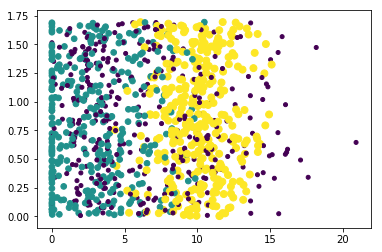

In [86]:
#使用第二列和第三列数据来进行可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 16.0*array(datingLabels), 16.0*array(datingLabels))
plt.show()

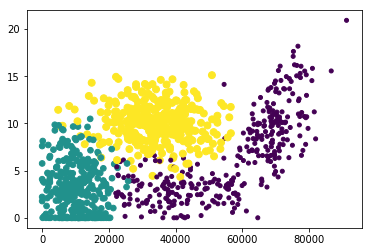

In [87]:
#使用第一列和第二列数据来进行可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 16.0*array(datingLabels), 16.0*array(datingLabels))
plt.show()

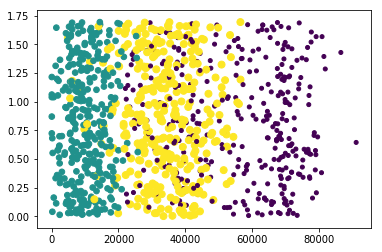

In [88]:
#使用第一列和第三列数据来进行可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,2], 16.0*array(datingLabels), 16.0*array(datingLabels))
plt.show()

### 归一化数据      
飞行常客里程数的数值远远大于其他两个特征的数值。      
因此，处理不同取值范围的特征值时，通常采用的方法是**数值归一化**。    
如将数值取值处理为0到1或者-1到1之间。       
$newValue = (oldValue-min) / (max-min)$

In [89]:
#归一化特征值函数
def autoNorm(dataSet):
    #min(0)中的0参数可以获得列的最小值，而不是行的
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    #tile函数将变量内容复制成输入矩阵同样大小的矩阵
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet / tile(ranges, (m,1))    #特征值相除
    return normDataSet, ranges, minVals

In [90]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [91]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [92]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [93]:
minVals

array([0.      , 0.      , 0.001156])

### 测试算法     
* 错误率：对于分类器来说，错误率就是分类器给出错误结果的次数除以测试数据的总数。   
代码中添加一个计数器，用于统计错误分类的数量。

In [94]:
#测试代码
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    #使用百分之十的数据作为测试数据集
    numTestVecs = int(m * hoRatio)
    #错误分类计数器
    errorCount = 0.0
    for i in range(numTestVecs):
        classfierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                   datingLabels[numTestVecs:m], 4)
        print("the classifier came back with: %d, the real answer is: %d" % (classfierResult, datingLabels[i]))
        if (classfierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is : %f" % (errorCount/float(numTestVecs)))

In [95]:
datingClassTest()

[(3, 4)]
the classifier came back with: 3, the real answer is: 3
[(2, 2), (3, 2)]
the classifier came back with: 2, the real answer is: 2
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(3, 3), (1, 1)]
the classifier came back with: 3, the real answer is: 3
[(3, 4)]
the classifier came back with: 3, the real answer is: 3
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(3, 4)]
the classifier came back with: 3, the real answer is: 3
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(2, 4)]
the classifier came back with: 2, the real answer is: 2
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]
the classifier came back with: 1, the real answer is: 1
[(1, 4)]


### 构建可用分类器系统

In [96]:
def classifyPerson():
    resultList = ['不喜欢的人', '魅力一般', '极具魅力']
    percentTats = float(input(
                    "玩视频游戏所耗时间百分比?"))
    ffMiles = float(input(
                    "每年获得的飞行常客里程数?"))
    iceCream = float(input(
                    "每周消费的冰淇淋公升数? "))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 4)
    print("你可能对这个人感兴趣的程度为: ", resultList[classifierResult - 1])

In [97]:
classifyPerson()

玩视频游戏所耗时间百分比?10
每年获得的飞行常客里程数?10000
每周消费的冰淇淋公升数? 0.5
[(2, 3), (3, 1)]
你可能对这个人感兴趣的程度为:  魅力一般
